In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
from src.databases import Postgresql 

# Análise Exploratória

In [4]:
query = """ SELECT * FROM ficha_tecnicav1;"""

bd = Postgresql(user='postgres' , password='bruno22#' , host= 'localhost', port= '5432', database = 'brunods')
dataset = bd.retrieve_data(query=query)
dataset.head(3)

Buscando os dados!!!
Conexão com Postgresql fechada


,sku,tipo,uva,country,region,vinicola,teor_alcoolico,amadurecimento,classificacao,safra,visual,ofativo,gustativo,temperatura,potencial_guarda
0,11549,Branco,Furmint (100.00%),Hungria,Tokaj,Pajzos,11.00% ABV,Sem passagem por carvalho.,Suave/Doce,2003,Amarelo dourado,"Frutas brancas maduras, mel, figo seco, frutas...","Doce, equilibrado, acidez agradável, final longo",10 °C,20 anos
1,12390,Branco,Sauvignon Blanc,França,Languedoc-Roussillon,Baron Philippe de Rothschild,12.00% ABV,Em tanques de aço inox.,Seco,2018,Amarelo claro,"Notas de frutas cítricas, lima, limão","Fresco, frutado e boa acidez",10 °C,3 anos
2,12733,Tinto,Tempranillo,Espanha,Ribera del Júcar,La Magdalena,14.50% ABV,4 meses em barricas de carvalho francês e amer...,Seco,2017,Rubi intenso com reflexos violáceos,"Frutas vermelhas maduras, especiarias e um lev...","Saboroso, taninos macios e final persistente",16 °C,5 anos


In [5]:
#Pré-tratamento
dataset['potencial_guarda'] = dataset['potencial_guarda'].apply(lambda x: x.replace('anos',''))
dataset['potencial_guarda'] = dataset['potencial_guarda'].astype('int')
dataset['temperatura'] = dataset['temperatura'].apply(lambda x: x.replace('°C',''))
dataset['temperatura'] = dataset['temperatura'].astype('int')
dataset['teor_alcoolico'] = dataset['teor_alcoolico'].apply(lambda x: x.replace('% ABV',''))
dataset['teor_alcoolico'] = dataset['teor_alcoolico'].astype('float')

In [6]:
dataset.head(3)

,sku,tipo,uva,country,region,vinicola,teor_alcoolico,amadurecimento,classificacao,safra,visual,ofativo,gustativo,temperatura,potencial_guarda
0,11549,Branco,Furmint (100.00%),Hungria,Tokaj,Pajzos,11.0,Sem passagem por carvalho.,Suave/Doce,2003,Amarelo dourado,"Frutas brancas maduras, mel, figo seco, frutas...","Doce, equilibrado, acidez agradável, final longo",10,20
1,12390,Branco,Sauvignon Blanc,França,Languedoc-Roussillon,Baron Philippe de Rothschild,12.0,Em tanques de aço inox.,Seco,2018,Amarelo claro,"Notas de frutas cítricas, lima, limão","Fresco, frutado e boa acidez",10,3
2,12733,Tinto,Tempranillo,Espanha,Ribera del Júcar,La Magdalena,14.5,4 meses em barricas de carvalho francês e amer...,Seco,2017,Rubi intenso com reflexos violáceos,"Frutas vermelhas maduras, especiarias e um lev...","Saboroso, taninos macios e final persistente",16,5


In [7]:
#checando valores nulos
#Um valor nulo na variavel Safra não nos trara problemas
dataset.isnull().sum().sort_values(ascending=False)

potencial_guarda    0
temperatura         0
gustativo           0
ofativo             0
visual              0
safra               0
classificacao       0
amadurecimento      0
teor_alcoolico      0
vinicola            0
region              0
country             0
uva                 0
tipo                0
sku                 0
dtype: int64

# Variáveis Categoricas

In [8]:
# Insigths_categoricas
#Dos 517  vinhos 385 são tintos (74%), 120 são franceses (23%) somente 4% brasileiros, 78% são do tipo seco, 121 tem teor alcoolico de 13%, 67% dos vinhos são da safra de 2016 a 2018
dataset_temp = dataset.drop(['teor_alcoolico', 'temperatura', 'potencial_guarda'], axis=1)

In [9]:
dataset_temp.describe()

,sku,tipo,uva,country,region,vinicola,amadurecimento,classificacao,safra,visual,ofativo,gustativo
count,453,453,453,453,453,453,453,453,453,453,453,453
unique,451,5,289,16,118,157,275,4,19,72,422,414
top,13911,Tinto,Cabernet Sauvignon,Chile,Valle Central,Viña Las Perdices,Em tanques de aço inox.,Seco,2018,Rubi,"Frutas vermelhas, floral","Frutado, leve, acidez agradável"
freq,2,312,25,88,28,18,55,357,118,156,4,5


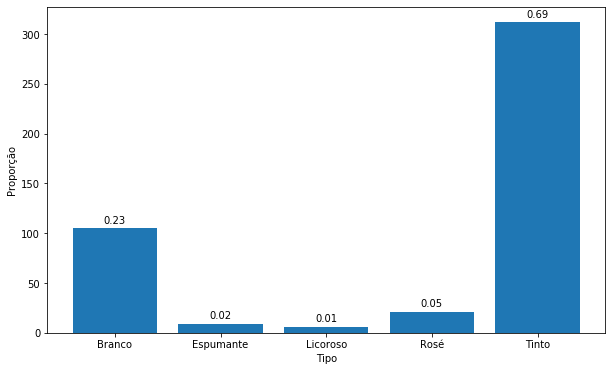

In [10]:
tipo_vinho = dataset_temp.loc[:,['tipo','sku']].groupby('tipo').count()
tipo_vinho.reset_index(inplace=True)


# Plot
fig, ax = plt.subplots(figsize= (10,6))
plot = ax.bar(tipo_vinho['tipo'], tipo_vinho['sku'])
ax.set_xlabel('Tipo')
ax.set_ylabel('Proporção')


for i in plot:
    var = round(i.get_height()/sum(tipo_vinho['sku']),2)
    ax.annotate('{}'.format(var),
                    xy=(i.get_x()+i.get_width()/2, i.get_height()),
                    xytext=(0,3),
                    textcoords="offset points",
                    ha='center', va='bottom')


plt.show()

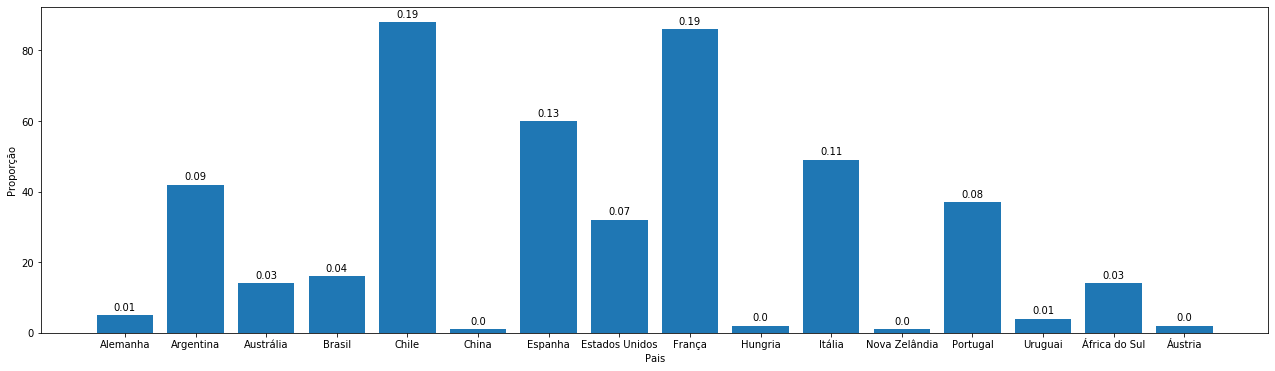

In [11]:
pais_vinho = dataset_temp.loc[:,['country','sku']].groupby('country').count()
pais_vinho.reset_index(inplace=True)


# Plot
fig, ax = plt.subplots(figsize= (22,6))
plot = ax.bar(pais_vinho['country'], pais_vinho['sku'])
ax.set_xlabel('Pais')
ax.set_ylabel('Proporção')


for i in plot:
    var = round(i.get_height()/sum(pais_vinho['sku']),2)
    ax.annotate('{}'.format(var),
                    xy=(i.get_x()+i.get_width()/2, i.get_height()),
                    xytext=(0,3),
                    textcoords="offset points",
                    ha='center', va='bottom')


plt.show()

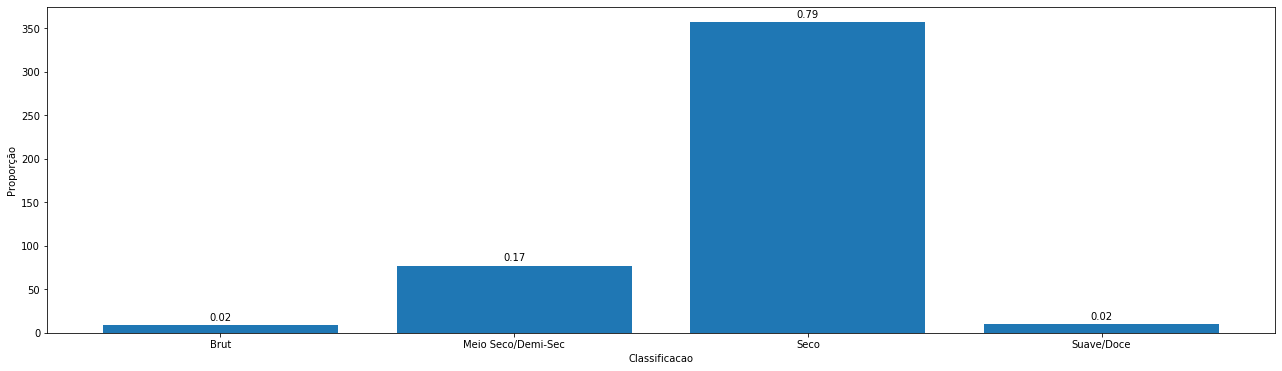

In [12]:
class_vinho = dataset_temp.loc[:,['classificacao','sku']].groupby('classificacao').count()
class_vinho.reset_index(inplace=True)


# Plot
fig, ax = plt.subplots(figsize= (22,6))
plot = ax.bar(class_vinho['classificacao'], class_vinho['sku'])
ax.set_xlabel('Classificacao')
ax.set_ylabel('Proporção')


for i in plot:
    var = round(i.get_height()/sum(class_vinho['sku']),2)
    ax.annotate('{}'.format(var),
                    xy=(i.get_x()+i.get_width()/2, i.get_height()),
                    xytext=(0,3),
                    textcoords="offset points",
                    ha='center', va='bottom')


plt.show()

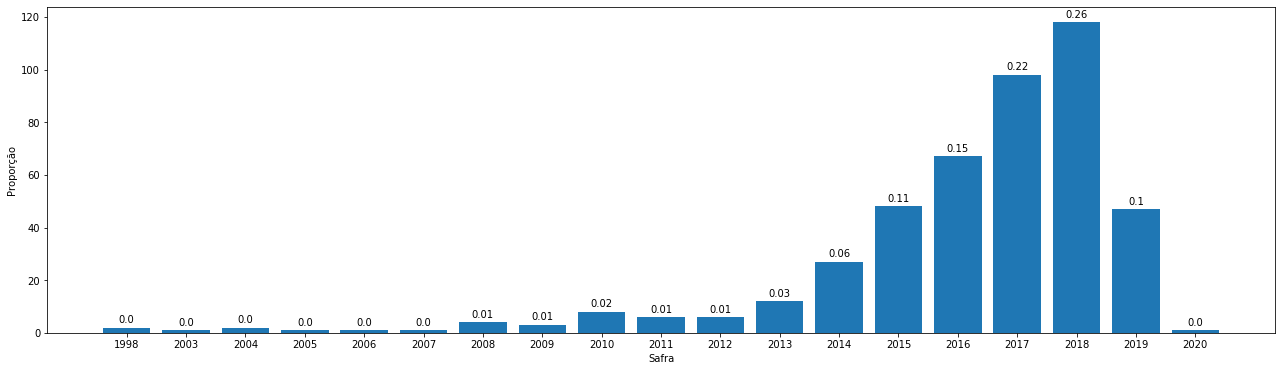

In [13]:
safra_vinho = dataset_temp.loc[:,['safra','sku']].groupby('safra').count()
safra_vinho.reset_index(inplace=True)


# Plot
fig, ax = plt.subplots(figsize= (22,6))
plot = ax.bar(safra_vinho['safra'], safra_vinho['sku'])
ax.set_xlabel('Safra')
ax.set_ylabel('Proporção')


for i in plot:
    var = round(i.get_height()/sum(safra_vinho['sku']),2)
    ax.annotate('{}'.format(var),
                    xy=(i.get_x()+i.get_width()/2, i.get_height()),
                    xytext=(0,3),
                    textcoords="offset points",
                    ha='center', va='bottom')


plt.show()

# Variáveis Numericas

In [14]:
# Insigths_numericas
# Alto std do potencial de guarda com vinhos podendo ter até 50 anos de potencial de guarda

dataset_num = dataset.copy()
dataset_num.describe().round(2)

,teor_alcoolico,temperatura,potencial_guarda
count,453.00,453.00,453.00
mean,13.41,13.57,6.93
std,1.03,3.31,5.18
min,5.50,7.00,2.00
25%,13.00,10.00,4.00
50%,13.50,15.00,5.00
75%,14.00,16.00,8.00
max,18.00,18.00,50.00


# Checando se os dados seguem distribuição normal.

Text(0.5, 0, 'Potencial Guarda')

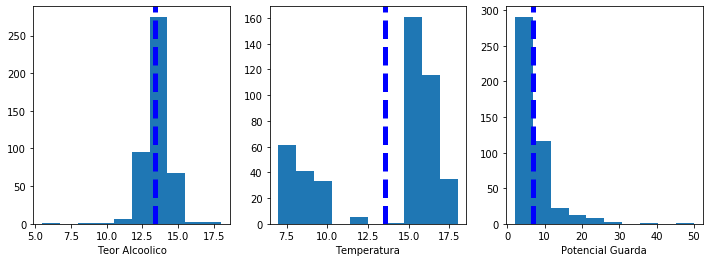

In [15]:
# Tabela ficha_tecnica
f, (ax,ax1,ax2) = plt.subplots(1,3, figsize=(12,4))

plot = ax.hist(dataset_num['teor_alcoolico'])
ax.axvline(np.mean(dataset_num['teor_alcoolico']), color='b', linestyle='dashed', linewidth=5)

plot1 = ax1.hist(dataset_num['temperatura'])
ax1.axvline(np.mean(dataset_num['temperatura']), color='b', linestyle='dashed', linewidth=5)

plot2 = ax2.hist(dataset_num['potencial_guarda'])
ax2.axvline(np.mean(dataset_num['potencial_guarda']), color='b', linestyle='dashed', linewidth=5)


ax.set_xlabel('Teor Alcoolico')
ax1.set_xlabel('Temperatura')
ax2.set_xlabel('Potencial Guarda')


Buscando os dados!!!
Conexão com Postgresql fechada


Text(0.5, 0, 'rating')

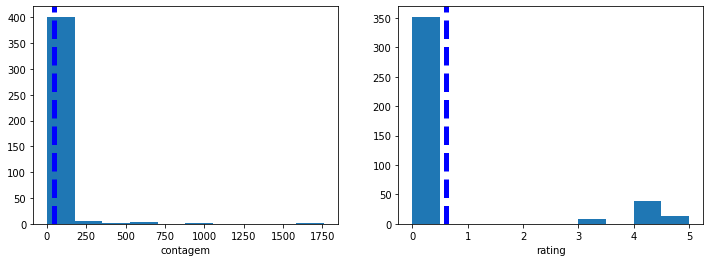

In [59]:
#Tabela rating
query_rating = """SELECT * FROM ratingv1 """ 
dataset_rating = bd.retrieve_data(query=query_rating)


f, (ax,ax1) = plt.subplots(1,2, figsize=(12,4))
plot = ax.hist(dataset_rating['contagem'])
ax.axvline(np.mean(dataset_rating['contagem']), color='b', linestyle='dashed', linewidth=5)
plot1 = ax1.hist(dataset_rating['rating'])
ax1.axvline(np.mean(dataset_rating['rating']), color='b', linestyle='dashed', linewidth=5)

ax.set_xlabel('contagem')
ax1.set_xlabel('rating')

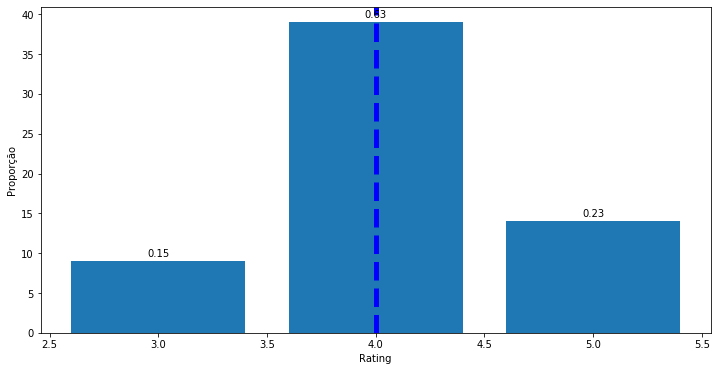

In [58]:
# >= rating 4 = 1
# < rating 4 = 0

rating_vinho = dataset_rating.loc[dataset_rating['rating'] != 0,['rating','sku']].groupby('rating').count()
rating_vinho.reset_index(inplace=True)


# Plot
fig, ax = plt.subplots(figsize= (12,6))
plot = ax.bar(rating_vinho['rating'], rating_vinho['sku'])
ax.set_xlabel('Rating')
ax.set_ylabel('Proporção')
plt.axvline(np.mean(rating_vinho['rating']), color='b', linestyle='dashed', linewidth=5)

for i in plot:
    var = round(i.get_height()/sum(rating_vinho['sku']),2)
    ax.annotate('{}'.format(var),
                    xy=(i.get_x()+i.get_width()/2, i.get_height()),
                    xytext=(0,3),
                    textcoords="offset points",
                    ha='center', va='bottom')


plt.show()

In [60]:
# boxplots dos preços
# Total
query_boxplot_pop= """SELECT * FROM pricev1 """ 
dataset_price_boxplots = bd.retrieve_data(query=query_boxplot_pop)

seq1 = dataset_price_boxplots['price_socio'].astype('float')
seq2 = dataset_price_boxplots['price_nonsocio'].astype('float')


#Por pais
query_boxplot_pais= """SELECT country, price_socio, price_nonsocio FROM pricev1 pr inner join ficha_tecnicav1 ft on pr.sku=ft.sku """ 
query_boxplot_pais_box = bd.retrieve_data(query=query_boxplot_pais)

dat1 = query_boxplot_pais_box.loc[:, ['country','price_socio']]
dat1['price_socio'] = dat1['price_socio'].astype('float') 
dat2 = query_boxplot_pais_box.loc[:, ['country','price_nonsocio']]
dat2['price_nonsocio'] = dat2['price_nonsocio'].astype('float')

#Por tipo
query_boxplot_tipo= """SELECT tipo, price_socio, price_nonsocio FROM pricev1 pr inner join ficha_tecnicav1 ft on pr.sku=ft.sku """ 
dataset_price_tipo_box = bd.retrieve_data(query=query_boxplot_tipo)

set1 =  dataset_price_tipo_box.loc[:, ['tipo','price_socio']]
set1['price_socio'] = set1['price_socio'].astype('float')
set2 =  dataset_price_tipo_box.loc[:, ['tipo','price_nonsocio']]
set2['price_nonsocio'] = set2['price_nonsocio'].astype('float')

#Por classificação
query_boxplot_class= """SELECT classificacao, price_socio, price_nonsocio FROM pricev1 pr inner join ficha_tecnicav1 ft on pr.sku=ft.sku """ 
dataset_price_class_box = bd.retrieve_data(query=query_boxplot_class)

part1 = dataset_price_class_box.loc[:, ['classificacao','price_socio']]
part1['price_socio'] = part1['price_socio'].astype('float')
part2 = dataset_price_class_box.loc[:, ['classificacao','price_nonsocio']]
part2['price_nonsocio'] = part2['price_nonsocio'].astype('float')

Buscando os dados!!!
Conexão com Postgresql fechada
Buscando os dados!!!
Conexão com Postgresql fechada
Buscando os dados!!!
Conexão com Postgresql fechada
Buscando os dados!!!
Conexão com Postgresql fechada


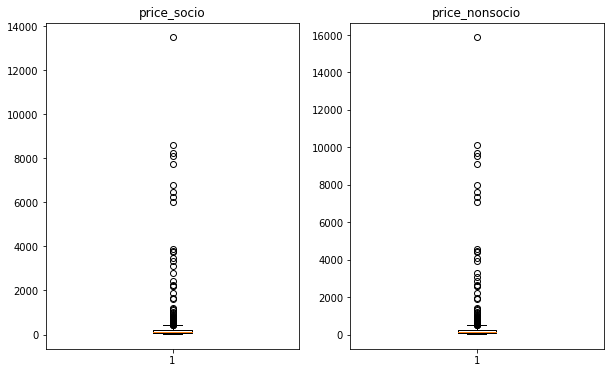

In [61]:
# Boxplots Prices Total
f, (ax,ax1) = plt.subplots(1,2, figsize = (10,6))
ax.boxplot(seq1)
ax.set_title('price_socio')
ax1.boxplot(seq2)
ax1.set_title('price_nonsocio')
plt.show()

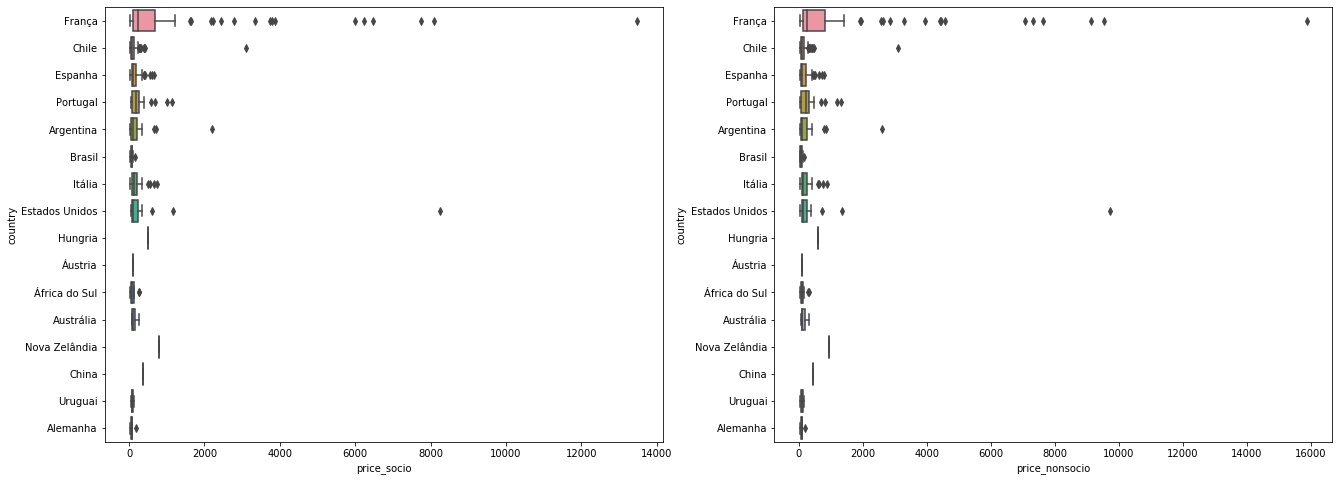

In [62]:
# Boxplots Prices per country
f, (ax,ax1) = plt.subplots(1,2, figsize = (22,8))
sns.boxplot(dat1['price_socio'], dat1['country'], data=dat1, ax=ax)
sns.boxplot(dat2['price_nonsocio'], dat2['country'], data=dat2, ax=ax1)

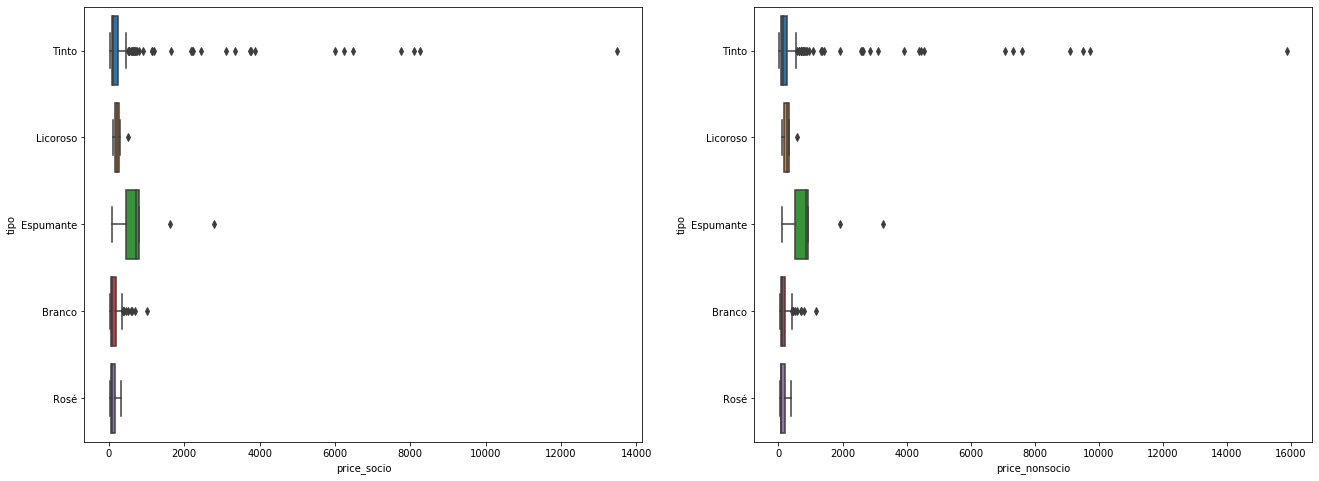

In [63]:
# Boxplots Prices per tipo
f, (ax,ax1) = plt.subplots(1,2, figsize = (22,8))
sns.boxplot(set1['price_socio'], set1['tipo'], data=set1, ax=ax)
sns.boxplot(set2['price_nonsocio'], set2['tipo'], data=set2, ax=ax1)

# Testes-T e ANOVA

# Pergunta 1:
#### Existem diferenças significativas nos ratings por pais?

- Hipotese nula - Todos os países não possuem diferenças siginificativas entre seus ratings.

- Hipotese alternativa - Pelo menos um par de pais possui diferença siginificativa em seus ratings. 

# Conclusão:
Não existem evidências suficientes para se rejeitar a hipotese nula

In [64]:
query = """ SELECT country, avg(rating) 
            FROM ficha_tecnicav1 ft
            INNER JOIN ratingv1 pr on ft.sku=pr.sku
            GROUP BY country;"""

bd = Postgresql(user='postgres' , password='bruno22#' , host= 'localhost', port= '5432', database = 'brunods')
dataset = bd.retrieve_data(query=query)
dataset

Buscando os dados!!!
Conexão com Postgresql fechada


,country,avg
0,Argentina,0.413793
1,Hungria,0.000000
2,Estados Unidos,0.333333
3,Chile,0.666667
4,Espanha,0.560976
5,África do Sul,0.000000
6,Uruguai,0.000000
7,Austrália,1.000000
8,Brasil,1.222222
9,Itália,1.037037


In [66]:
#test t-test ranting vinhos brasil e argentina

query = """ SELECT country, rating 
            FROM ficha_tecnicav1 ft
            INNER JOIN ratingv1 pr on ft.sku=pr.sku;"""

bd = Postgresql(user='postgres' , password='bruno22#' , host= 'localhost', port= '5432', database = 'brunods')
dataset_test = bd.retrieve_data(query=query)

print('\n')
data1 = dataset_test.loc[dataset_test['country']== 'Brasil',:].rating
print(f'Tamanho da amostra um é {len(data1)}')
data2 = dataset_test.loc[dataset_test['country']== 'Argentina',:].rating
data2_sampled = np.random.choice(data2,3)
print(f'Tamanho da amostra um é {len(data2)}')
print('\n')      
      
stat, p = ttest_ind(data1, data2_sampled)
print(f'O valor de p é: {p}')

if p < 0.05:
    print('Provável haver diferença')
else:
    print('Provável que não haja diferença')

Buscando os dados!!!
Conexão com Postgresql fechada


Tamanho da amostra um é 9
Tamanho da amostra um é 29


O valor de p é: 0.295273243381649
Provável que não haja diferença


In [68]:
#test ANOVA

query = """ SELECT country, rating 
            FROM ficha_tecnicav1 ft
            INNER JOIN ratingv1 pr on ft.sku=pr.sku;"""

bd = Postgresql(user='postgres' , password='bruno22#' , host= 'localhost', port= '5432', database = 'brunods')
dataset_test = bd.retrieve_data(query=query)


data1 = dataset_test.loc[dataset_test['country']== 'Argentina',:].rating
data2 = dataset_test.loc[dataset_test['country']== 'Estados Unidos',:].rating
data4 = dataset_test.loc[dataset_test['country']== 'Chile',:].rating
data5 = dataset_test.loc[dataset_test['country']== 'Espanha',:].rating
data6 = dataset_test.loc[dataset_test['country']== 'África do Sul',:].rating
data7 = dataset_test.loc[dataset_test['country']== 'Uruguai',:].rating
data8 = dataset_test.loc[dataset_test['country']== 'Austrália',:].rating
data9 = dataset_test.loc[dataset_test['country']== 'Brasil',:].rating
data10 = dataset_test.loc[dataset_test['country']== 'Itália',:].rating
data11 = dataset_test.loc[dataset_test['country']== 'Portugal',:].rating
data12 = dataset_test.loc[dataset_test['country']== 'França',:].rating

print(f"""Tamanho original das distribuições: Argentina: {len(data1)}, 
                                            Estados Unidos: {len(data2)}, China: {len(data3)}, Chile: {len(data4)}, 
                                            Espanha: {len(data5)}, África do Sul: {len(data6)}, Uruguai: {len(data7)}, 
                                            Austrália: {len(data8)}, Brasil: {len(data9)}, Itália: {len(data10)}
                                            Portugal: {len(data11)}, França: {len(data12)} """)



stat, p = f_oneway(data1, data2, data4, data5, data6, data7, data8, data9, data10, data11, data12)
print(f'O valor de p é: {p}')

if p < 0.05:
    print('Provável haver diferença')
else:
    print('Provável que não haja diferença')

Buscando os dados!!!
Conexão com Postgresql fechada
Tamanho original das distribuições: Argentina: 29, 
                                            Estados Unidos: 24, China: 0, Chile: 63, 
                                            Espanha: 41, África do Sul: 9, Uruguai: 3, 
                                            Austrália: 8, Brasil: 9, Itália: 27
                                            Portugal: 24, França: 44 
O valor de p é: 0.4838432194194534
Provável que não haja diferença


# Pergunta 2
#### Existem diferenças significativas nos ratings por tipo de Vinho?

- Hipotese nula - Todos os tipos de vinho não possuem diferenças siginificativas entre seus ratings.

- Hipotese alternativa - Pelo menos um par de tipo de vinho possui diferença siginificativa em seus ratings. 

# Conclusão
Valor de p abaixo de 0.05, existem evidências sufucientes para a refutar hipotese nula.

In [70]:
#test ANOVA


query = """ SELECT tipo, rating 
            FROM ficha_tecnicav1 ft
            INNER JOIN ratingv1 pr on ft.sku=pr.sku;"""

bd = Postgresql(user='postgres' , password='bruno22#' , host= 'localhost', port= '5432', database = 'brunods')
dataset_test2 = bd.retrieve_data(query=query)


data1 = dataset_test2.loc[dataset_test2['tipo'] == 'Tinto',:].rating
data2 = dataset_test2.loc[dataset_test2['tipo'] == 'Espumante',:].rating
data3 = dataset_test2.loc[dataset_test2['tipo'] == 'Branco',:].rating
data4 = dataset_test2.loc[dataset_test2['tipo'] == 'Rosé',:].rating

print('\n')
stat, p = f_oneway(data1, data2, data3, data4)
print(f'O valor de p é: {p}')

if p < 0.05:
    print('Provável haver diferença')
else:
    print('Provável que não haja diferença')

Buscando os dados!!!
Conexão com Postgresql fechada


O valor de p é: 0.8153633082284559
Provável que não haja diferença


# Pergunta 3
 - Hiportese Nula: Não existe diferença siginificativa entre preços de sócio e não sócios.
 - HiposteseAlternativa: Existe diferença siginificativa entre os preços de sócio e não sócios.
 
# Conclusão:
Não existem evidências que levem a rejeição da hipostese nula

In [71]:
# diferença entre preço de socio e nao socio 
query = """ SELECT price_socio, price_nonsocio 
            FROM pricev1;"""

bd = Postgresql(user='postgres' , password='bruno22#' , host= 'localhost', port= '5432', database = 'brunods')
dataset_price_test = bd.retrieve_data(query=query)


print('\n')
data1 = dataset_price_test['price_socio'].astype('float')
print(f'Tamanho da amostra um é {len(data1)}')
data2 = dataset_price_test['price_nonsocio'].astype('float')
print(f'Tamanho da amostra um é {len(data2)}')
print('\n')      
      
stat, p = ttest_ind(data1, data2)
print(f'O valor de p é: {p}')

if p < 0.05:
    print('Provável haver diferença')
else:
    print('Provável que não haja diferença')

Buscando os dados!!!
Conexão com Postgresql fechada


Tamanho da amostra um é 671
Tamanho da amostra um é 671


O valor de p é: 0.35074506521549187
Provável que não haja diferença


# Prices

# Pergunta 4
 - Hipotese Nula: Não existe diferença siginificativa de preços por país.
 - Hipotese Alternativa: Existe diferença siginificativa de preços por país.
 ### Conclusão:
 Existem evidências suficientes para negar a a hipotese nula.

# Pergunta 5 
 - Hipotese Nula: Não existe diferença siginificativa de preços por tipo de vinho.
 - Hipotese Alternativa: Existe diferença siginificativa de preços por tipo de vinho.
 ### Conclusão:
 Existem evidências suficientes para negar a a hipotese nula.

In [73]:
# Preço_Socio por pais - Vinhos Frnaceses são os mais caros!
query = """ SELECT country, price_socio
            FROM ficha_tecnicav1 ft
            INNER JOIN pricev1 pr on ft.sku=pr.sku;"""

bd = Postgresql(user='postgres' , password='bruno22#' , host= 'localhost', port= '5432', database = 'brunods')
dataset_price_test2 = bd.retrieve_data(query=query)
dataset_price_test2.price_socio = dataset_price_test2.price_socio.astype('float') 

avgs = dataset_price_test2.groupby('country').mean()

Buscando os dados!!!
Conexão com Postgresql fechada


In [74]:
data1 = dataset_price_test2.loc[dataset_price_test2['country'] == 'Argentina',:].price_socio
data2 = dataset_price_test2.loc[dataset_price_test2['country'] == 'Estados Unidos',:].price_socio
data3 = dataset_price_test2.loc[dataset_price_test2['country'] == 'China',:].price_socio
data4 = dataset_price_test2.loc[dataset_price_test2['country'] == 'Chile',:].price_socio
data5 = dataset_price_test2.loc[dataset_price_test2['country'] == 'Espanha',:].price_socio
data6 = dataset_price_test2.loc[dataset_price_test2['country'] == 'África do Sul',:].price_socio
data7 = dataset_price_test2.loc[dataset_price_test2['country'] == 'Uruguai',:].price_socio
data8 = dataset_price_test2.loc[dataset_price_test2['country'] == 'Austrália',:].price_socio
data9 = dataset_price_test2.loc[dataset_price_test2['country'] == 'Brasil',:].price_socio
data10 = dataset_price_test2.loc[dataset_price_test2['country'] == 'Itália',:].price_socio
data11 = dataset_price_test2.loc[dataset_price_test2['country'] == 'Portugal',:].price_socio
data12 = dataset_price_test2.loc[dataset_price_test2['country'] == 'França',:].price_socio

stat, p = f_oneway(data1, data2, data3, data4, data5, data6, data7, data8, data9, data10, data11, data12)
print(f'O valor de p é: {p}')

if p < 0.05:
    print('Provável haver diferença')
else:
    print('Provável que não haja diferença')

O valor de p é: 7.057869072901634e-07
Provável haver diferença


In [75]:
#Preço_Socio por tipo

query = """ SELECT tipo, price_socio 
            FROM ficha_tecnicav1 ft
            INNER JOIN pricev1 pr on ft.sku=pr.sku;"""

bd = Postgresql(user='postgres' , password='bruno22#' , host= 'localhost', port= '5432', database = 'brunods')
dataset_price_test2_tipo = bd.retrieve_data(query=query)
dataset_price_test2_tipo.price_socio = dataset_price_test2_tipo.price_socio.astype('float') 

data1 = dataset_price_test2_tipo.loc[dataset_price_test2_tipo['tipo'] == 'Tinto',:].price_socio
data2 = dataset_price_test2_tipo.loc[dataset_price_test2_tipo['tipo'] == 'Espumante',:].price_socio
data3 = dataset_price_test2_tipo.loc[dataset_price_test2_tipo['tipo'] == 'Branco',:].price_socio
data4 = dataset_price_test2_tipo.loc[dataset_price_test2_tipo['tipo'] == 'Rosé',:].price_socio

stat, p = f_oneway(data1, data2, data3, data4)
print(f'O valor de p é: {p}')

if p < 0.05:
    print('Provável haver diferença')
else:
    print('Provável que não haja diferença')

Buscando os dados!!!
Conexão com Postgresql fechada
O valor de p é: 0.04600308244119404
Provável haver diferença


In [76]:
#Preço_nonSocio por pais
query = """ SELECT country, price_nonsocio 
            FROM ficha_tecnicav1 ft
            INNER JOIN pricev1 pr on ft.sku=pr.sku;"""

bd = Postgresql(user='postgres' , password='bruno22#' , host= 'localhost', port= '5432', database = 'brunods')
dataset_price_test3_country = bd.retrieve_data(query=query)
dataset_price_test3_country.price_nonsocio = dataset_price_test3_country.price_nonsocio.astype('float')

data1 = dataset_price_test3_country.loc[dataset_price_test3_country['country'] == 'Argentina',:].price_nonsocio
data2 = dataset_price_test3_country.loc[dataset_price_test3_country['country'] == 'Estados Unidos',:].price_nonsocio
data3 = dataset_price_test3_country.loc[dataset_price_test3_country['country'] == 'China',:].price_nonsocio
data4 = dataset_price_test3_country.loc[dataset_price_test3_country['country'] == 'Chile',:].price_nonsocio
data5 = dataset_price_test3_country.loc[dataset_price_test3_country['country'] == 'Espanha',:].price_nonsocio
data6 = dataset_price_test3_country.loc[dataset_price_test3_country['country'] == 'África do Sul',:].price_nonsocio
data7 = dataset_price_test3_country.loc[dataset_price_test3_country['country'] == 'Uruguai',:].price_nonsocio
data8 = dataset_price_test3_country.loc[dataset_price_test3_country['country'] == 'Austrália',:].price_nonsocio
data9 = dataset_price_test3_country.loc[dataset_price_test3_country['country'] == 'Brasil',:].price_nonsocio
data10 = dataset_price_test3_country.loc[dataset_price_test3_country['country'] == 'Itália',:].price_nonsocio
data11 = dataset_price_test3_country.loc[dataset_price_test3_country['country'] == 'Portugal',:].price_nonsocio
data12 = dataset_price_test3_country.loc[dataset_price_test3_country['country'] == 'França',:].price_nonsocio

stat, p = f_oneway(data1, data2, data3, data4, data5, data6, data7, data8, data9, data10, data11, data12)
print(f'O valor de p é: {p}')

if p > 0.05:
    print('Provável haver diferença')
else:
    print('Provável que não haja diferença')

Buscando os dados!!!
Conexão com Postgresql fechada
O valor de p é: 5.904276807543449e-07
Provável que não haja diferença


In [77]:
# Preço_nonSocio por tipo
query = """ SELECT tipo, price_nonsocio 
            FROM ficha_tecnicav1 ft
            INNER JOIN pricev1 pr on ft.sku=pr.sku;"""

bd = Postgresql(user='postgres' , password='bruno22#' , host= 'localhost', port= '5432', database = 'brunods')
dataset_price_test3 = bd.retrieve_data(query=query)
dataset_price_test3.price_nonsocio = dataset_price_test3.price_nonsocio.astype('float') 

#Médias
avgs = dataset_price_test3.groupby('tipo').mean()

data1 = dataset_price_test3.loc[dataset_price_test3['tipo'] == 'Tinto',:].price_nonsocio
data2 = dataset_price_test3.loc[dataset_price_test3['tipo'] == 'Espumante',:].price_nonsocio
data3 = dataset_price_test3.loc[dataset_price_test3['tipo'] == 'Branco',:].price_nonsocio
data4 = dataset_price_test3.loc[dataset_price_test3['tipo'] == 'Rosé',:].price_nonsocio


stat, p = f_oneway(data1, data2, data3, data4)
print(f'O valor de p é: {p}')

if p < 0.05:
    print('Provável haver diferença')
else:
    print('Provável que não haja diferença')

Buscando os dados!!!
Conexão com Postgresql fechada
O valor de p é: 0.04645567987878071
Provável haver diferença
